# Descenso Gradiente

#pip install matplotlib

## Descenso Gradiente para funciones de una variable

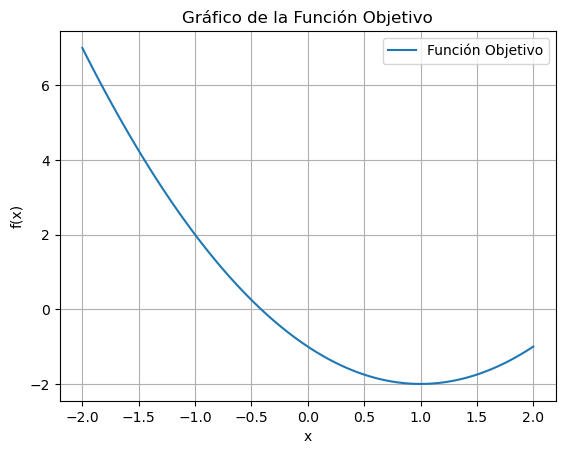

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo
def funcion_objetivo(x):
    return x**2 - 2*x - 1

def gradiente(x):
    return 2*x - 2
# Crear valores x
x = np.linspace(-2, 2, 100)

# Calcular los valores y
y = funcion_objetivo(x)

# Graficar la función
plt.plot(x, y, label='Función Objetivo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de la Función Objetivo')
plt.legend()
plt.grid(True)
plt.show()


In [106]:
def descenso_gradiente(x_inicio, tasa_aprendizaje, n):
    x_valores = [x_inicio]
    y_inicio=funcion_objetivo(x_inicio)
    y_valores= [y_inicio]
    for _ in range(n):
        x_inicio = x_inicio - tasa_aprendizaje * gradiente(x_inicio)
        y_inicio=funcion_objetivo(x_inicio)
        x_valores.append(x_inicio)
        y_valores.append(y_inicio)
    print(" i  | x_i  |f'(x_i) |  y_i     ")
    print("------------------------")
    for x,y in zip(x_valores,y_valores):
        print(f" {x_valores.index(x)} |{x:.4f} |{gradiente(x):.4f} | {y:.4f}")

In [107]:
descenso_gradiente(-5,0.1, 20)

 i  | x_i  |f'(x_i) |  y_i     
------------------------
 0 |-5.0000 |-12.0000 | 34.0000
 1 |-3.8000 |-9.6000 | 21.0400
 2 |-2.8400 |-7.6800 | 12.7456
 3 |-2.0720 |-6.1440 | 7.4372
 4 |-1.4576 |-4.9152 | 4.0398
 5 |-0.9661 |-3.9322 | 1.8655
 6 |-0.5729 |-3.1457 | 0.4739
 7 |-0.2583 |-2.5166 | -0.4167
 8 |-0.0066 |-2.0133 | -0.9867
 9 |0.1947 |-1.6106 | -1.3515
 10 |0.3558 |-1.2885 | -1.5849
 11 |0.4846 |-1.0308 | -1.7344
 12 |0.5877 |-0.8246 | -1.8300
 13 |0.6701 |-0.6597 | -1.8912
 14 |0.7361 |-0.5278 | -1.9304
 15 |0.7889 |-0.4222 | -1.9554
 16 |0.8311 |-0.3378 | -1.9715
 17 |0.8649 |-0.2702 | -1.9817
 18 |0.8919 |-0.2162 | -1.9883
 19 |0.9135 |-0.1729 | -1.9925
 20 |0.9308 |-0.1384 | -1.9952


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Función objetivo y su derivada
def funcion_objetivo(x):
    return x**4 - 2*x - 1

def gradiente(x):
     return 4*(x**3) - 2

def descenso_gradiente_animado(x_inicio, tasa_aprendizaje, n):
    x_valores = [x_inicio]
    for _ in range(n):
        x_inicio = x_inicio - tasa_aprendizaje * gradiente(x_inicio)
        x_valores.append(x_inicio)
    
    # Crear la animación
    def animar(i):
        plt.clf()
        plt.axhline(0, color='black', linewidth=0.5)
        plt.axvline(0, color='black', linewidth=0.5)
        plt.plot(rango_x, funcion_objetivo(rango_x), label='Función Objetivo')
        plt.plot(x_valores[i], funcion_objetivo(x_valores[i]), 'ro', label='Punto Actual')
        plt.annotate(f'Iteración: {i}', xy=(x_valores[i], funcion_objetivo(x_valores[i])),
                     xytext=(x_valores[i] + 1, funcion_objetivo(x_valores[i]) + 5),
                     arrowprops=dict(facecolor='black', shrink=0.05))
        
        # Agregar el valor de y al costado de la bola roja
        plt.text(x_valores[i] + 1, funcion_objetivo(x_valores[i]), f'({x_valores[i]:.2f}, {funcion_objetivo(x_valores[i]):.2f})')
        
        plt.legend()
        plt.title('Animación de Descenso del Gradiente')

    fig = plt.figure()
    rango_x = np.linspace(-2, 2, 100)
    animacion = FuncAnimation(fig, animar, frames=len(x_valores), repeat=False)

    # Mostramos la animación
    from IPython.display import HTML
    return HTML(animacion.to_jshtml())


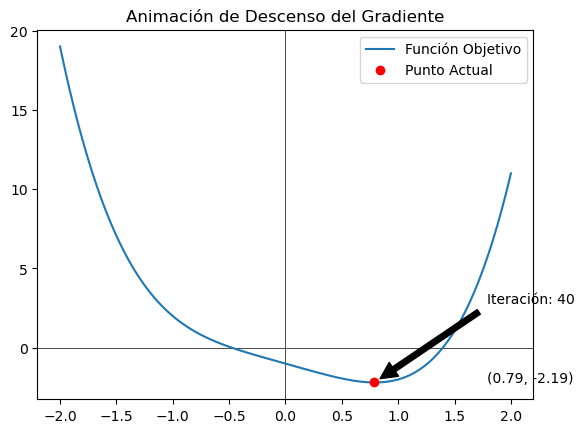

In [24]:
descenso_gradiente_animado(-2, 0.03, 40)

## Descenso Gradiente para funcion de dos variables

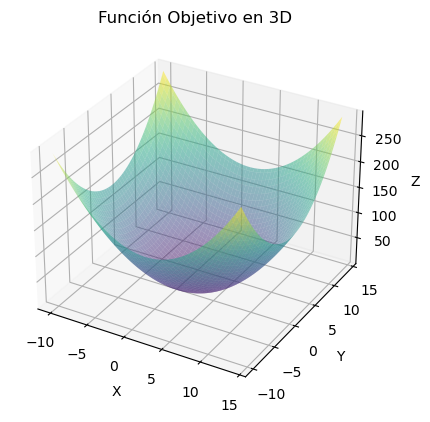

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función objetivo en 3D
def objective_function(x, y):
    return x**2 - 4*x + y**2 - 4*y + 11
def gradient(x, y):
    return np.array([2*x - 4, 2*y - 4])


# Crear una malla para la visualización de la función
x = np.linspace(-10, 14, 100)
y = np.linspace(-10, 14, 100)
x, y = np.meshgrid(x, y)
z = objective_function(x, y)

# Visualizar la función objetivo en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie
ax.plot_surface(x, y, z, alpha=0.5, cmap='viridis')

# Etiquetas y título
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Función Objetivo en 3D')

# Mostrar la gráfica
plt.show()


In [99]:
# Descenso del gradiente en 3D
def gradient_descent_3d(x_inicio, y_inicio, tasa_aprendizaje, n):
    xy_valores = [(x_inicio, y_inicio)]
    z_inicio = objective_function(x_inicio, y_inicio)
    z_valores = [z_inicio]
    for _ in range(n):
        x_inicio, y_inicio = np.subtract((x_inicio, y_inicio), tasa_aprendizaje * gradient(x_inicio, y_inicio))
        z_inicio = objective_function(x_inicio, y_inicio)
        xy_valores.append((x_inicio, y_inicio))
        z_valores.append(z_inicio)
    print(" i  | (x_i,y_i)      |    grad        |   z_i     ")
    print("------------------------------------------------")
    for i, (xy, z) in enumerate(zip(xy_valores, z_valores)):
        print(f" {i} | ({xy[0]:.4f}, {xy[1]:.4f})|({ gradient(xy[0],xy[1])[0]:.4f},{ gradient(xy[0],xy[1])[1]:.4f}) | {z:.4f}")

# Paréntesis y dos puntos que faltan al final
gradient_descent_3d(5, 5, 0.1, 20)


 i  | (x_i,y_i)      |    grad        |   z_i     
------------------------------------------------
 0 | (5.0000, 5.0000)|(6.0000,6.0000) | 21.0000
 1 | (4.4000, 4.4000)|(4.8000,4.8000) | 14.5200
 2 | (3.9200, 3.9200)|(3.8400,3.8400) | 10.3728
 3 | (3.5360, 3.5360)|(3.0720,3.0720) | 7.7186
 4 | (3.2288, 3.2288)|(2.4576,2.4576) | 6.0199
 5 | (2.9830, 2.9830)|(1.9661,1.9661) | 4.9327
 6 | (2.7864, 2.7864)|(1.5729,1.5729) | 4.2370
 7 | (2.6291, 2.6291)|(1.2583,1.2583) | 3.7916
 8 | (2.5033, 2.5033)|(1.0066,1.0066) | 3.5067
 9 | (2.4027, 2.4027)|(0.8053,0.8053) | 3.3243
 10 | (2.3221, 2.3221)|(0.6442,0.6442) | 3.2075
 11 | (2.2577, 2.2577)|(0.5154,0.5154) | 3.1328
 12 | (2.2062, 2.2062)|(0.4123,0.4123) | 3.0850
 13 | (2.1649, 2.1649)|(0.3299,0.3299) | 3.0544
 14 | (2.1319, 2.1319)|(0.2639,0.2639) | 3.0348
 15 | (2.1056, 2.1056)|(0.2111,0.2111) | 3.0223
 16 | (2.0844, 2.0844)|(0.1689,0.1689) | 3.0143
 17 | (2.0676, 2.0676)|(0.1351,0.1351) | 3.0091
 18 | (2.0540, 2.0540)|(0.1081,0.1081) | 3.

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Función objetivo y su derivada en 3D
def objective_function(x, y):
    return x**2 - 4*x + y**2 - 4*y + 11

def gradient(x, y):
    return np.array([2*x - 4, 2*y - 4])

# Descenso del gradiente en 3D
def gradient_descent_3d_animado(x_inicio, y_inicio, tasa_aprendizaje, n):
    xy_valores = [(x_inicio, y_inicio)]
    z_inicio = objective_function(x_inicio, y_inicio)
    z_valores = [z_inicio]
    for _ in range(n):
        x_inicio, y_inicio = np.subtract((x_inicio, y_inicio), tasa_aprendizaje * gradient(x_inicio, y_inicio))
        z_inicio = objective_function(x_inicio, y_inicio)
        xy_valores.append((x_inicio, y_inicio))
        z_valores.append(z_inicio)
    # Crear la animación
    fig = plt.figure()  # Mueve la creación de la figura aquí
    ax = fig.add_subplot(111, projection='3d')

    def animate(i):
        ax.clear()
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
        ax.scatter(xy_valores[i][0], xy_valores[i][1], z_valores[i], color='red', s=50, label='Punto Actual')

        # Mostrar los valores de x, y, z en la bola roja
        ax.text(xy_valores[i][0], xy_valores[i][1], z_valores[i], f'({xy_valores[i][0]:.2f}, {xy_valores[i][1]:.2f}, {z_valores[i]:.2f})')

        # Transponer la lista de coordenadas antes de extraer las coordenadas x e y
        x_history, y_history = zip(*xy_valores[:i+1])

        ax.plot(x_history, y_history, z_valores[:i+1], color='blue', label='Recorrido')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Función Objetivo')
        ax.legend()
        ax.set_title('Descenso del Gradiente en 3D')

    animacion = FuncAnimation(fig, animate, frames=len(xy_valores), repeat=False)

    # Mostrar la animación
    from IPython.display import HTML
    return HTML(animacion.to_jshtml())

X, Y = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-15, 15, 100))
Z = objective_function(X, Y)

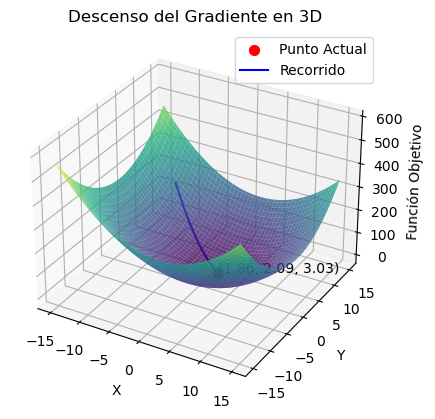

In [81]:
gradient_descent_3d_animado(-10, 10, 0.1, 20)

# 2. Método de descenso de gradiente para el  ejemplo 2

In [1]:
import numpy as np

"""
Queremos buscar los valores óptimos de w y b
de nuestro modelo lineal y=w*x+b que mejor
se ajusten a nuestros datos de entrenamiento

Datos de entrenamiento:
X=[0, 1, 2, 3]
Y=[1, 3, 5, 7]

Ecuación ideal -> y=2*x+1
Vamos a buscar estos parámetros
mediante gradient descent
"""


class RegresionLineal:
    def __init__(self, lr: float = 0.05, epoch: int = 150):
        self.lr = lr
        self.epoch = epoch
        self.w = 1
        self.b = 2

    def forward(self, x: np.ndarray):
        """
        Realiza la prediccion de nuestro modelo lineal (y=w*x+b)
        """
        return self.w * x + self.b

    @staticmethod
    def ecm(y_hat: np.ndarray, y: np.ndarray):
        """
        Función de coste (Error Cuadrático Medio)
        """
        s = y_hat - y
        loss = s ** 2
        return s, np.mean(loss)

    def fit(self, x: np.ndarray, y: np.ndarray):
        """
        Entrenamos/Optimizamos el modelo lineal
        """
        for epoch in range(self.epoch):
            # Forward
            y_hat = self.forward(x)
            # Calculamos loss
            s, avg_loss = self.ecm(y_hat, y)
            # Calculamos derivadas
            # dL/dw y dL/db
            dw = np.mean(2 * x * s)
            db = np.mean(2 * s)
            # Actualizamos parametros
            self.w = self.w - self.lr * dw
            self.b = self.b - self.lr * db
            # Mostrar stats.
            if epoch % 20 == 0:
                print(f'Epoch {epoch} la loss {avg_loss:.4f}')


if __name__ == "__main__":
    x_train = np.array([0, 1, 2, 3], dtype=np.float32)
    y_train = np.array([1, 3, 5, 7], dtype=np.float32)
    linear_reg = RegresionLineal(lr=0.05, epoch=180)
    linear_reg.fit(x_train, y_train)
    # y=2*x+1
    print(f'w termino con valor de {linear_reg.w} y b termino con valor de {linear_reg.b}')

Epoch 0 la loss 1.5000
Epoch 20 la loss 0.1572
Epoch 40 la loss 0.0470
Epoch 60 la loss 0.0140
Epoch 80 la loss 0.0042
Epoch 100 la loss 0.0013
Epoch 120 la loss 0.0004
Epoch 140 la loss 0.0001
Epoch 160 la loss 0.0000
w termino con valor de 1.997540491819381 y b termino con valor de 1.0052512317895896


# 3. Algoritmos Genéticos

In [4]:
#importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

**Ejercicio:** Encontrar el máximo valor para la siguiente función objetivo:
$$ f(x)=2- (0.1 + (1-x)^2 - 0.1 \cos(6 \pi (1-x))) 
$$

In [6]:
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

In [7]:
y_axis = []
x_axis=np.arange(0,2,0.02)

for num in x_axis:
    y_axis.append(fx(num))

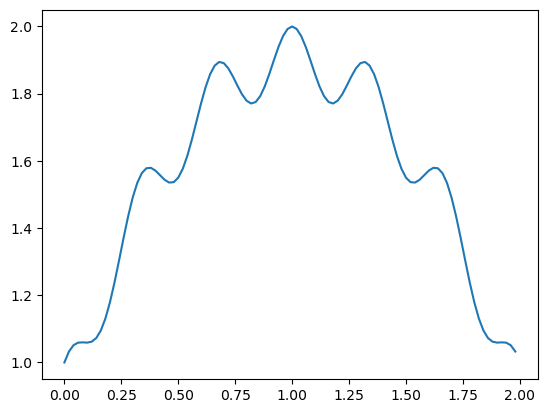

In [8]:
plt.plot(x_axis,y_axis)

### Representación de los genes

Necesitamos representar los genes como una lista para poder realizar la mutación y el entrecruzamiento. Así que debemos manejar una función que convierta una lista en números decimales.

In [10]:
def listToDecimal(num):
    decimal=0
    for i in range(len(num)):
        decimal+=num[i]*10**(-i)
    return decimal

In [11]:
x=[0,5,4]
listToDecimal(x)

0.54

Tomaremos individuos con cromosomas de 15 genes

In [12]:
ind_size = 15
#Genetic pool
genetic_pool=[[0,1],[0,1,2,3,4,5,6,7,8,9]]

individuo = []
individuo += [np.random.choice(genetic_pool[0])]
individuo += list(np.random.choice(genetic_pool[1],ind_size-1))

individuo

[1, 1, 0, 5, 3, 9, 3, 4, 2, 3, 6, 9, 3, 7, 8]

In [13]:
listToDecimal(individuo)

1.1053934236937801

**Obs:** Al convertir la lista en decimal podemos notar una pequeña variación al final debido a la forma en que python realiza la suma de punto flotante, pero nada de mucho peso.

## Elección:
Finalmente, generamos una población llena de individuos con genes aleatorios. De esta población vamos a elegir los mejores.

In [14]:
poblacion = []

for i in range(100):
    individuo = []
    individuo += [np.random.choice(genetic_pool[0])]
    individuo += list(np.random.choice(genetic_pool[1],ind_size-1))
    poblacion.append(individuo)
poblacion[:10]

[[1, 6, 8, 0, 1, 7, 4, 1, 1, 1, 1, 4, 9, 7, 6],
 [0, 8, 8, 4, 3, 0, 0, 9, 7, 9, 6, 9, 5, 7, 0],
 [0, 2, 6, 9, 7, 5, 0, 8, 5, 6, 9, 5, 3, 0, 9],
 [1, 4, 2, 6, 0, 4, 1, 0, 7, 1, 9, 1, 2, 5, 0],
 [0, 1, 6, 7, 2, 0, 0, 3, 8, 5, 1, 2, 8, 4, 0],
 [1, 8, 7, 5, 0, 4, 6, 5, 9, 3, 5, 2, 6, 1, 5],
 [1, 9, 5, 1, 5, 1, 7, 3, 4, 8, 4, 4, 3, 5, 6],
 [1, 9, 0, 7, 2, 8, 7, 9, 1, 2, 4, 0, 3, 9, 4],
 [0, 9, 3, 7, 7, 7, 6, 1, 3, 8, 1, 7, 5, 3, 6],
 [0, 6, 5, 4, 6, 2, 6, 5, 1, 3, 1, 8, 3, 9, 8]]

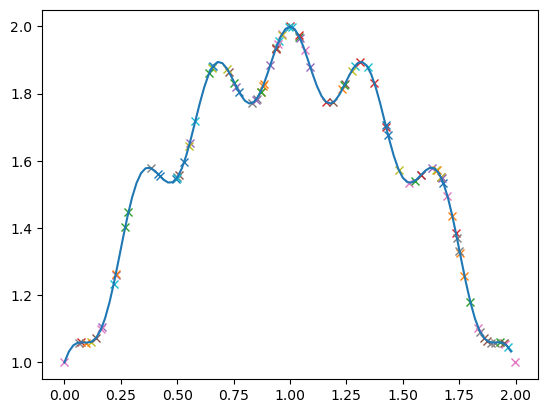

In [15]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

## Fitness
$\text{Fit}(x)=\dfrac{f(x)}{\sum_{x\in\mathbb{P} }f(x)}$

Los números más grandes producen un porcentaje mayor, y ya que la probabilidad se mide entre 0 y 1, esto ya nos permite darle una probabilidad mayor de reproducirse a los mejores individuos, aquellos que obtuvieron números más grandes en $y$.

In [16]:
fitness =[]

#extraigo los valores de y para medir su éxito
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    fitness += [y]
    
#convierto fitnees en un vector para realizar operaciones
#más fácilmente
fitness = np.array(fitness)

#divido todos los valores de y para la suma total
#y así obtener valores entre 0 y 1
fitness=fitness/fitness.sum()

In [17]:
fitness

array([0.00972317, 0.01159399, 0.00889274, 0.01078014, 0.00701253,
       0.00674124, 0.00669078, 0.00671334, 0.01226299, 0.01190348,
       0.00987235, 0.0114942 , 0.0116155 , 0.00671826, 0.01001512,
       0.01159647, 0.00972882, 0.01122662, 0.00672966, 0.01192366,
       0.00984734, 0.01154427, 0.00916701, 0.01225852, 0.0115351 ,
       0.01181067, 0.00696463, 0.00690995, 0.00997191, 0.00663787,
       0.0108224 , 0.00840062, 0.0097691 , 0.01200791, 0.00799052,
       0.00988006, 0.00634106, 0.00983077, 0.01189055, 0.01089613,
       0.01011637, 0.00996172, 0.01248291, 0.01161267, 0.01195264,
       0.00982907, 0.00635199, 0.00671462, 0.00984275, 0.01190408,
       0.01193575, 0.00671285, 0.00748342, 0.01124706, 0.00981268,
       0.00680529, 0.01222446, 0.01000192, 0.01187031, 0.01240561,
       0.01063004, 0.011449  , 0.00671802, 0.0126757 , 0.01190854,
       0.01124429, 0.00947629, 0.00844781, 0.01183872, 0.01266117,
       0.00979222, 0.00909383, 0.01144207, 0.00987005, 0.01245

## Cuzamiento
En este caso vamos a elegir dos padres al azar, de acuerdo a la probabilidad del fitness, para que produzcan un nuevo individuo.  
 
Luego, se elige un `cross_point` a partir del cual se van a combinar los genes de los padres. Se va a copiar los genes del primer padre hasta este punto, y luego los genes del otro padre.

In [19]:
size_poblacion = len(poblacion)
#hijos
offspring = []
for i in range(size_poblacion//2):
    parents = np.random.choice(size_poblacion, 2, p=fitness)
    cross_point = np.random.randint(ind_size)
    offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
    offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [20]:
offspring[:10]

[[0, 7, 2, 2, 1, 9, 4, 2, 8, 1, 5, 2, 6, 0, 5],
 [0, 5, 8, 0, 6, 4, 8, 2, 6, 5, 4, 3, 0, 6, 9],
 [0, 6, 5, 9, 6, 0, 3, 0, 2, 5, 8, 4, 4, 6, 7],
 [1, 7, 5, 3, 5, 5, 1, 7, 7, 9, 6, 7, 0, 5, 2],
 [0, 9, 9, 9, 4, 7, 8, 2, 2, 6, 3, 1, 3, 1, 4],
 [1, 7, 3, 5, 4, 8, 2, 0, 4, 2, 7, 5, 1, 4, 2],
 [1, 5, 6, 9, 5, 1, 9, 7, 8, 4, 5, 0, 0, 4, 4],
 [0, 8, 5, 5, 6, 1, 0, 3, 6, 3, 7, 8, 1, 3, 2],
 [0, 8, 6, 9, 5, 1, 9, 7, 8, 4, 4, 3, 0, 6, 9],
 [0, 7, 2, 2, 1, 4, 8, 2, 6, 5, 5, 0, 0, 4, 4]]

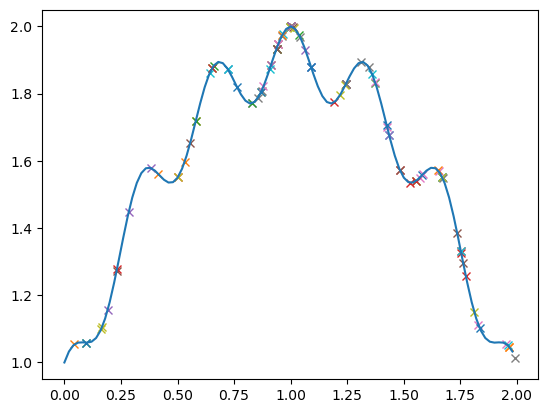

In [21]:
poblacion = offspring
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

## Mutaciones
Escogemos una probabilidad pequeña de que se produzca una mutación en los individuos. Lo que significa que el ADN de cualquier individuo puede producir un gen que no viene de sus padres.

In [22]:
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]
        individuals[i] = mutate_individual

In [23]:
mutate(poblacion,0.005,genetic_pool)
poblacion[:10]

[[0, 7, 2, 2, 1, 9, 4, 2, 8, 1, 5, 2, 6, 0, 5],
 [0, 5, 8, 8, 6, 4, 8, 2, 6, 5, 4, 3, 0, 6, 9],
 [0, 6, 5, 9, 6, 0, 3, 0, 2, 5, 8, 4, 4, 6, 7],
 [1, 7, 5, 3, 5, 5, 1, 7, 7, 9, 6, 7, 0, 5, 2],
 [0, 9, 9, 9, 7, 7, 8, 2, 2, 6, 3, 1, 3, 1, 4],
 [1, 7, 3, 5, 4, 8, 2, 0, 4, 2, 7, 5, 1, 4, 2],
 [1, 5, 6, 9, 5, 1, 9, 7, 8, 4, 5, 0, 0, 4, 4],
 [0, 8, 5, 5, 6, 1, 0, 3, 6, 3, 7, 8, 1, 3, 2],
 [0, 8, 6, 9, 5, 1, 9, 7, 8, 4, 4, 3, 0, 6, 9],
 [0, 7, 2, 2, 1, 4, 8, 2, 6, 5, 5, 0, 0, 4, 4]]

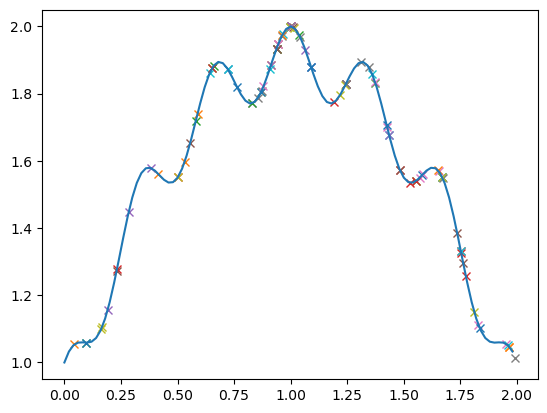

In [25]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

No hay un gran cambio debido a que la probabilidad de mutar es baja, pero así es como tiene que mantenerse, de lo contrario sería imposible llegar a una solución. La mutación debe ser muy poco frecuente.

## Resultado final

In [26]:
generaciones = 100

for _ in range(generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    
        
    
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,0.005,genetic_pool)
    

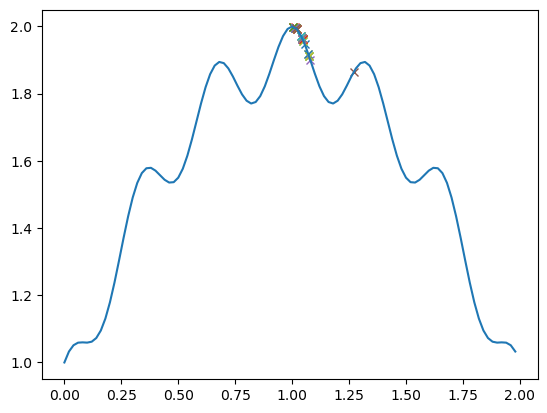

In [27]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [28]:
np.where(fitness == fitness.max())

(array([63], dtype=int64),)

In [29]:
listToDecimal(poblacion[41])

1.0195813867761099

In [30]:
fx(listToDecimal(poblacion[41]))

1.9928817954211295

**Podríamos dejarlos reproducirse por unas cuántas generaciones más a ver si siguen avanzando hacia el máximo.**

In [31]:
generaciones = 300

for _ in range(generaciones):
    
    fitness =[]

    #extraigo los valores de y para medir su éxito
    for individuo in poblacion:
        x = listToDecimal(individuo)
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector para realizar operaciones
    #más fácilmente
    fitness = np.array(fitness)

    #divido todos los valores de y para la suma total
    #y así obtener valores entre 0 y 1
    fitness=fitness/fitness.sum()    
        
    
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,0.005,genetic_pool)
    

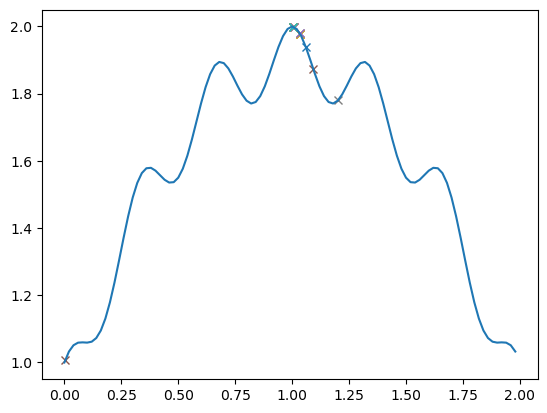

In [32]:
for individuo in poblacion:
    x = listToDecimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

listToDecimal(poblacion[np.where(fitness == fitness.max())[0][0]])

## Individuos con ADN binario
Si hacemos que el ADN no represente números binarios, sino una división, entonces el individuo será mucho más estable.

In [34]:
def bin_decimal(num_binario):
    return (np.sum(num_binario)/len(num_binario))*2

La función de arriba transforma una lista de números binarios en un número decimal que va desde 0 a 2. Cómo lo logra es bastante sencillo, suma todos los 1 del ADN y luego los divide para la longitud del ADN. Es muy similar al cálculo del fitness. Esto devuelve un número entre 0 y 1, si este número se multiplica por 2, ahora tenemos una forma de producir números entre 0 y 2.

In [35]:
#resultado de sumar todos los 1
individuo = [0,1,1,1,1,0]
bin_decimal(individuo)

1.3333333333333333

Una vez hecho esto, todos los pasos de arriba se aplican de igual forma.

In [36]:
poblacion = []
genetic_pool = [0,1]
for i in range(100):
    individuo = list(np.random.choice(genetic_pool,15))
    poblacion.append(individuo)
poblacion[:10]

[[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1],
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0]]

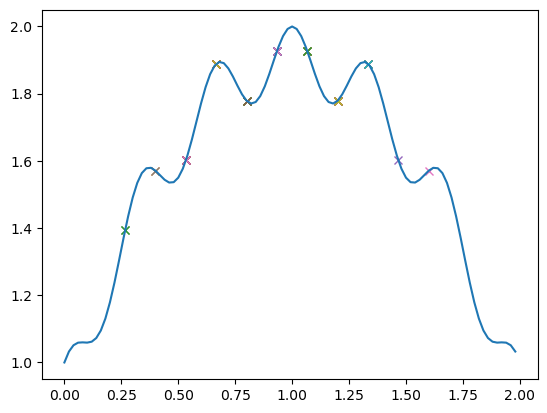

In [37]:
for individuo in poblacion:
    x = bin_decimal(individuo)
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)